## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [61]:
print("Train samples are :",x_train.shape , y_train.shape)

Train samples are : (60000, 28, 28) (60000,)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [63]:
print("Train samples are :",x_test.shape , y_test.shape)

Train samples are : (10000, 28, 28, 1) (10000,)


### Find dimensions of an image in the dataset

In [64]:
x_train[0].shape

(28, 28, 1)

In [0]:
x_train = x_train.astype('float32')

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [67]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255
y_train = y_train/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape

### Import the necessary layers from keras to build the model

In [0]:
import keras

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **


In [72]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

     # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))
    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]
    model3.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0015 - acc: 0.8624 - val_loss: 2.5416 - val_acc: 0.8397
Epoch 2/10
60000/60000 [==============================] - 18s 292us/step - loss: 9.8555e-04 - acc: 0.9076 - val_loss: 2.2127 - val_acc: 0.8607
Epoch 3/10
60000/60000 [==============================] - 17s 292us/step - loss: 7.6952e-04 - acc: 0.9276 - val_loss: 2.2686 - val_acc: 0.8574
Epoch 4/10
60000/60000 [==============================] - 17s 284us/step - loss: 6.0888e-04 - acc: 0.9429 - val_loss: 1.8198 - val_acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 17s 288us/step - loss: 4.8319e-04 - acc: 0.9550 - val_loss: 1.9336 - val_acc: 0.8790
Epoch 6/10
60000/60000 [==============================] - 17s 286us/step - loss: 3.7654e-04 - acc: 0.9645 - val_loss: 1.7876 - val_acc: 0.8878
Epoch 7/10
60000/60000 [==============================] - 17s 284us/step - loss: 2.9688e-04 - ac

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [81]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))
    # 2nd conv layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))
    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    # Dropout
    model3.add(Dropout(0.25))
     # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))


    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))
    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]
    model3.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0016 - acc: 0.8547 - val_loss: 1.7785 - val_acc: 0.8867
Epoch 2/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.0010 - acc: 0.9046 - val_loss: 1.7076 - val_acc: 0.8896
Epoch 3/10
60000/60000 [==============================] - 19s 313us/step - loss: 8.3528e-04 - acc: 0.9207 - val_loss: 1.6505 - val_acc: 0.8941
Epoch 4/10
60000/60000 [==============================] - 19s 319us/step - loss: 7.0575e-04 - acc: 0.9333 - val_loss: 1.9753 - val_acc: 0.8745
Epoch 5/10
60000/60000 [==============================] - 19s 312us/step - loss: 5.9081e-04 - acc: 0.9439 - val_loss: 1.6980 - val_acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 19s 314us/step - loss: 5.1049e-04 - acc: 0.9509 - val_loss: 1.7987 - val_acc: 0.8860
Epoch 7/10
60000/60000 [==============================] - 19s 313us/step - loss: 4.3634e-04 - acc: 0

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

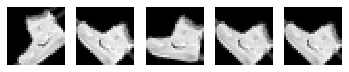

In [77]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

[]

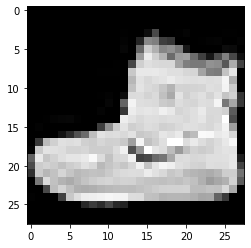

In [78]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

In [80]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=15,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/15
   8/1875 [..............................] - ETA: 35s - loss: 9.9802e-04 - acc: 0.9023

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=15)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 32s 17ms/step - loss: 9.8812e-04 - acc: 0.9063 - val_loss: 4.1186 - val_acc: 0.7407
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 9.7121e-04 - acc: 0.9084 - val_loss: 4.6342 - val_acc: 0.7082
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 9.5101e-04 - acc: 0.9103 - val_loss: 4.5530 - val_acc: 0.7131
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 9.2702e-04 - acc: 0.9133 - val_loss: 4.6847 - val_acc: 0.7054
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 9.3293e-04 - acc: 0.9124 - val_loss: 4.8182 - val_acc: 0.6972
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 9.1694e-04 - acc: 0.9143 - val_loss: 4.5358 - val_acc: 0.7136
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 9.0097e-04 - acc: 0.9140 - val_loss: 4.5915 - val_acc: 0.7109
Epoch 8/15
1875/1875 [=========

###  Report the final train and validation accuracy

In [84]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 92us/step
[2.0589054386138916, 0.8708]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [156]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train=x_train/255
#x_test=x_test/255
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

### **Prepare/fit the generator.**

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')

In [165]:
x_train.shape
x_test.shape
print(y_train.shape , y_test.shape)

(50000, 10) (10000, 10)


In [176]:
model4 = Sequential()
model4.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model4.add(Activation('relu'))
# 2nd conv layer
model4.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
model4.add(Activation('relu'))
    # Store Training Results
 # Prediction Layer

model4.add(Flatten())
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
#callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  """


In [177]:
model4.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=5,
                    validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=1562, epochs=5)`
  after removing the cwd from sys.path.


Epoch 1/5
1562/1562 [==============================] - 41s 26ms/step - loss: 1.6344 - acc: 0.4155 - val_loss: 10.2237 - val_acc: 0.3581
Epoch 2/5
1562/1562 [==============================] - 40s 26ms/step - loss: 1.4204 - acc: 0.4947 - val_loss: 9.5309 - val_acc: 0.4003
Epoch 3/5
1562/1562 [==============================] - 40s 26ms/step - loss: 1.3371 - acc: 0.5288 - val_loss: 10.6635 - val_acc: 0.3327
Epoch 4/5
1562/1562 [==============================] - 40s 26ms/step - loss: 1.2822 - acc: 0.5445 - val_loss: 9.9839 - val_acc: 0.3744
Epoch 5/5
1562/1562 [==============================] - 40s 26ms/step - loss: 1.2518 - acc: 0.5583 - val_loss: 10.0787 - val_acc: 0.3668


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

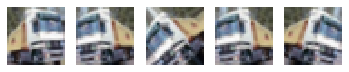

In [163]:
gen = datagen.flow(x_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()